### Семплирование из потока

Определим 2 перестановки разных размеров из которых будет происходить семплирование

In [36]:
import random as rd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
small = list(range(1, 101))
big = list(range(1, 1001))
rd.shuffle(small)
rd.shuffle(big)

In [13]:
import heapq # используем нестандартную библиотку для <priority_queue>

Я использовал алгоритм с кучей, а не с вектором, потому, что не нашёл быстрого способа сделать в питоне аналог nth_element из std:: + т.к. поток перемешан, то количество сравнений будет одинаковым в обоих случаях. Переписывать свой код из аркадии на питон нету времени - остаётся 2 часа до дедлайна :)

In [17]:
class Heap:
    def __init__(self, maxSize):
        self.maxSize = maxSize
        self.storage = []
    def insert(self, el): # (weight, el)
        if len(self.storage) == self.maxSize:
            if (self.storage[0] > el):
                return
            else:
                heapq.heapreplace(self.storage, el)
        else:
            heapq.heappush(self.storage, el)
    def reset(self):
        self.storage = []

In [63]:
def generate(times, base, m, weight_func):
    def generate_1(base, m, weight_func):
        hp = Heap(m)
        for _ in base:
            r = rd.random() ** (1 / weight_func(_))
            hp.insert((r, _))
        return hp.storage
    res = [0] * len(base)
    for _ in range(times):
        sample = generate_1(base, m, weight_func)
        for w,i in sample:
            res[i - 1] += 1
    return res

Протестируем алгоритм для всех указанных случаев

In [64]:
import pylab as py

In [65]:
sample_100_5_linear = generate(10000, small, 5, lambda i : i)

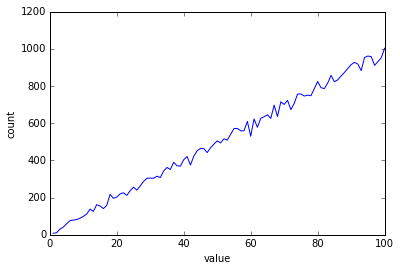

In [71]:
py.plot(sorted(small), sample_100_5_linear)
py.xlabel("value")
py.ylabel("count")

In [67]:
sample_100_5_quadratic = generate(10000, small, 5, lambda i : i * i)

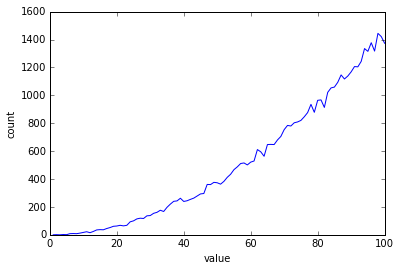

In [73]:
py.plot(sorted(small), sample_100_5_quadratic)
py.xlabel("value")
py.ylabel("count")

Видно, что применение квадратичной функции делает график более похожим на параболу. (Я брал по 10к повторений, т.к. на 1к было многовато выбросов). В целом, встречаемость элементов пропорциональна его значению=весу. Для лучшего сравнения в дальнейшем графики будут печататься вместе

In [74]:
sample_1000_10_linear = generate(10000, big, 10, lambda i : i)

In [75]:
sample_1000_10_quadratic = generate(10000, big, 10, lambda i : i * i)

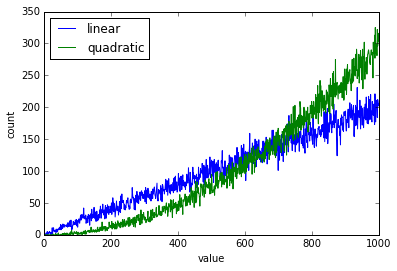

In [79]:
py.plot(sorted(big), sample_1000_10_linear)
py.plot(sorted(big), sample_1000_10_quadratic)
py.legend(['linear', 'quadratic'], loc=0)
py.xlabel("value")
py.ylabel("count")

Шума довольно много, но, по-прежнему, тренд можно проследить

In [80]:
sample_1000_20_linear = generate(10000, big, 20, lambda i : i)
sample_1000_20_quadratic = generate(10000, big, 20, lambda i : i * i)

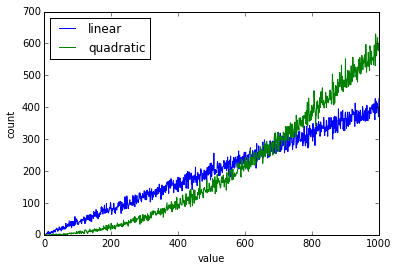

In [81]:
py.plot(sorted(big), sample_1000_20_linear)
py.plot(sorted(big), sample_1000_20_quadratic)
py.legend(['linear', 'quadratic'], loc=0)
py.xlabel("value")
py.ylabel("count")

В этом эксперименте менялось только количество элементов, которое мы семплировали. Выглядит так, будто в случае семплирования по 20 (а не по 10) границы между семплами с линейными весами и квадратичными лучше выделяются.  